In [1]:
import pandas as pd
from datetime import datetime

# Load the dataset
file_path ='customer_value_analysis.csv' 


In [2]:
customer_df = pd.read_csv(file_path)

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
print(customer_df.shape)

(9134, 24)


In [5]:
display(customer_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

None

In [6]:
#Renaming columns, formatting
customer_df.columns = customer_df.columns.str.lower().str.replace(' ', '_')


In [7]:
#changing the type of effetive_to_date column to DateTime format
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], format='%m/%d/%y')

In [8]:
#Checking for misssing values, NaN
nan_values = customer_df.isnull().sum()
print(nan_values)

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64


In [9]:
#defining function to separte numerical and categorical columns
def separate_numerical_categorical(df):
    numerical_df = df.select_dtypes(include=['float64', 'int64'])
    categorical_df = df.select_dtypes(include=['object'])
    return numerical_df, categorical_df

In [10]:
#dropping any ID column and replacing the ID column for the real ID column, customer
customer_df = customer_df.drop(columns=['customer'])

In [11]:
#time for correlation matrix only for numerical variables
numerical_df, _ = separate_numerical_categorical(customer_df)
correlation_matrix = numerical_df.corr()

In [12]:
# Checking for the numerical variables with the highest correlation
highest_corr_pair = correlation_matrix.abs().stack().idxmax()
var1, var2 = highest_corr_pair

# Extracting variable names
var_name1, var_name2 = var1[0], var1[1]

print(f"Variables with the highest correlation: {var_name1} and {var_name2}")
print(f"Highest correlation value: {correlation_matrix.abs().loc[highest_corr_pair]}")


Variables with the highest correlation: c and u
Highest correlation value: 1.0


In [13]:
# Print correlation matrix for numerical variables
print(correlation_matrix)

# Find the maximum correlation value (excluding self-correlation)
max_corr = correlation_matrix[~correlation_matrix.isna()].max().max()
display(f"\nMaximum correlation value (excluding self-correlation): {max_corr}")


                               customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.024366   
income                                        0.024366  1.000000   
monthly_premium_auto                          0.396262 -0.016665   
months_since_last_claim                       0.011517 -0.026715   
months_since_policy_inception                 0.009418 -0.000875   
number_of_open_complaints                    -0.036343  0.006408   
number_of_policies                            0.021955 -0.008656   
total_claim_amount                            0.226451 -0.355254   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.396262                 0.011517   
income                                    -0.016665                -0.026715   
monthly_premium_auto                       1.000000                 0.005026   
months_since_last_claim                    0.005026                

'\nMaximum correlation value (excluding self-correlation): 1.0'

In [14]:
# Looking at the correlation matrix, it seems that the pair of variables with the highest correlation is 'monthly_premium_auto' and 'total_claim_amount', with a correlation coefficient of approximately 0.632.
# Meaning there are an strong linear relationship between these 2 variables (threre is correlation)
#as the monthly premium for auto insurance increases, there is a tendency for the total claimed amount to increase as well. This relationship could be expected, as customers who opt for higher monthly premiums might do so to have more extensive coverage, and thus, they might also file claims for a larger amount.


In [15]:
#Defining function for separating continuous and discrete numerical columns
def separate_continuous_discrete(df, threshold=36):
    continuous_df = df.loc[:, df.nunique() > threshold]
    discrete_df = df.loc[:, df.nunique() <= threshold]
    return continuous_df, discrete_df

In [16]:
#creating new dataframes
continuous_df, discrete_df = separate_continuous_discrete(numerical_df)

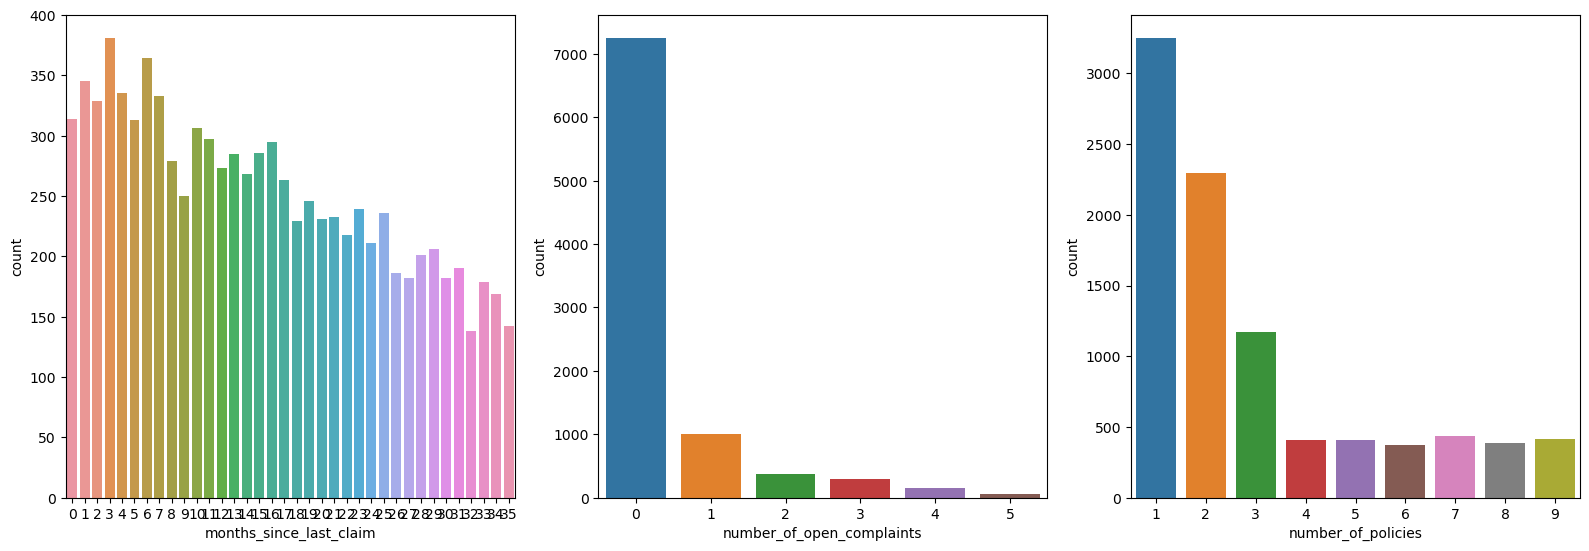

In [17]:
#creating function for barplot for all the columns of the discrete dataframe using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

def plot_discrete_columns(df):
    plt.figure(figsize=(16, 16))
    for i, column in enumerate(df.columns):
        plt.subplot(3, 3, i + 1)
        sns.countplot(x=column, data=df)
    plt.tight_layout()
    plt.show()

# to plot barplots for discrete columns
plot_discrete_columns(discrete_df)


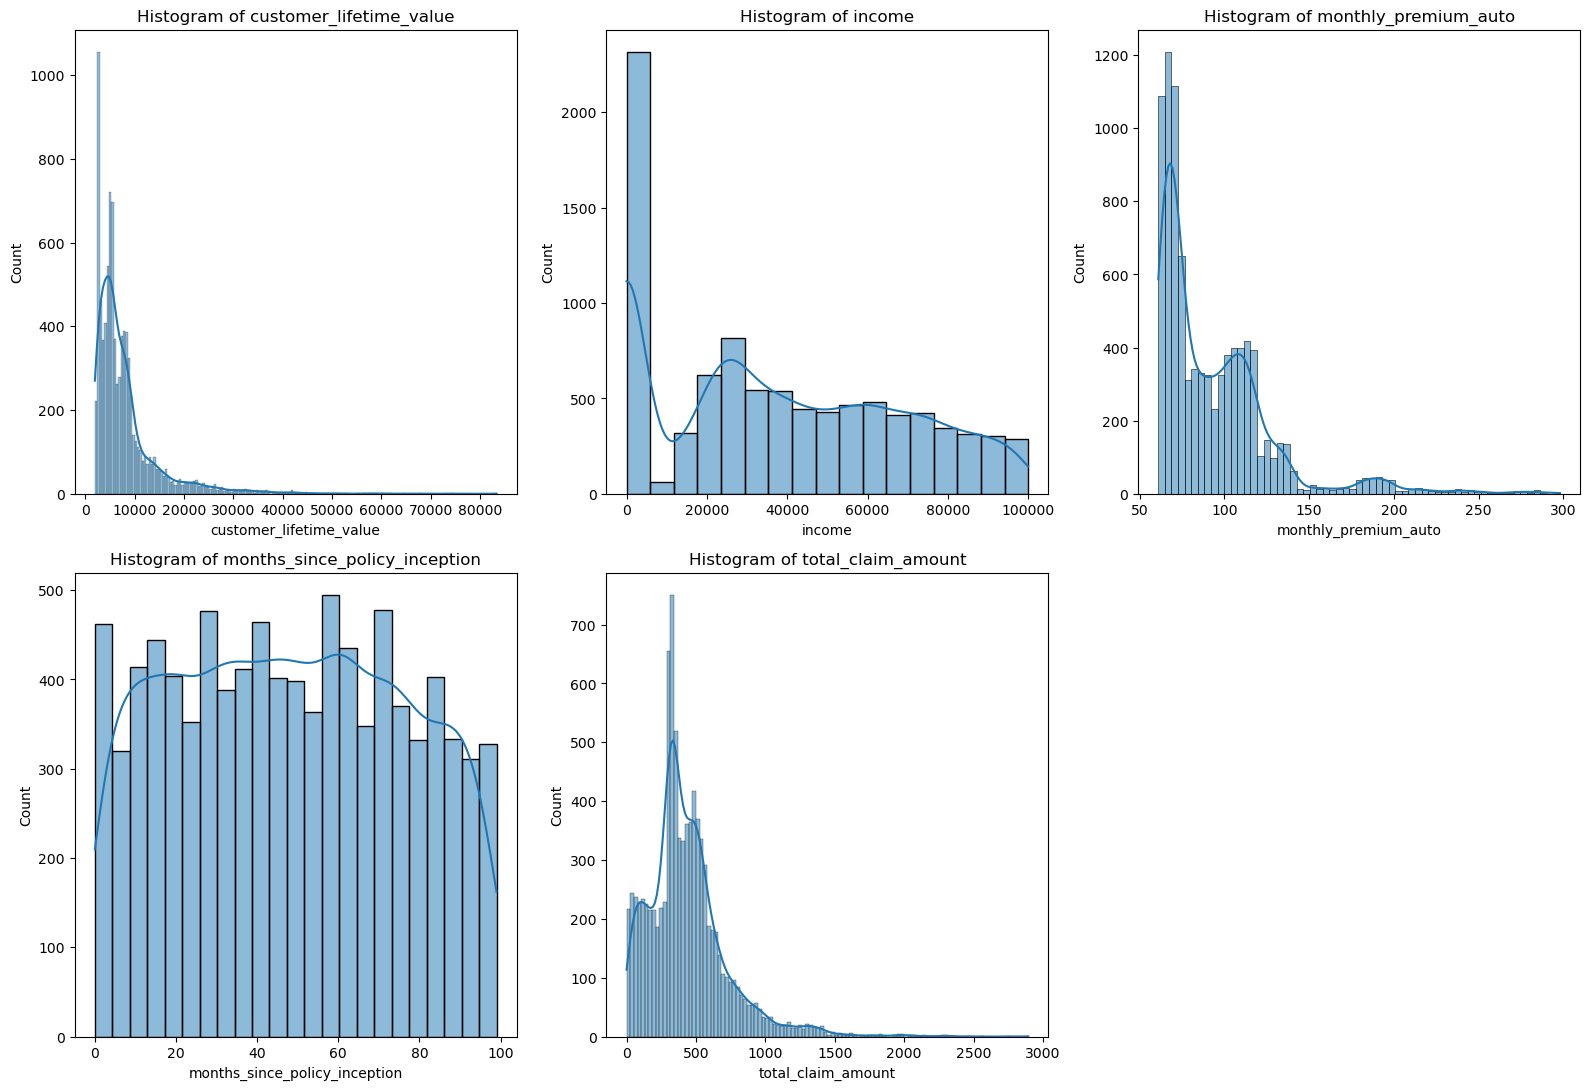

In [18]:
#histogram for the columns continuous dataframe using Seaborn
def plot_continuous_columns(df):
    plt.figure(figsize=(16, 16))
    for i, column in enumerate(df.columns):
        plt.subplot(3, 3, i + 1)
        sns.histplot(df[column], kde=True)
        plt.title(f'Histogram of {column}')
    plt.tight_layout()
    plt.show()

# to plot histograms for continuous columns
plot_continuous_columns(continuous_df)



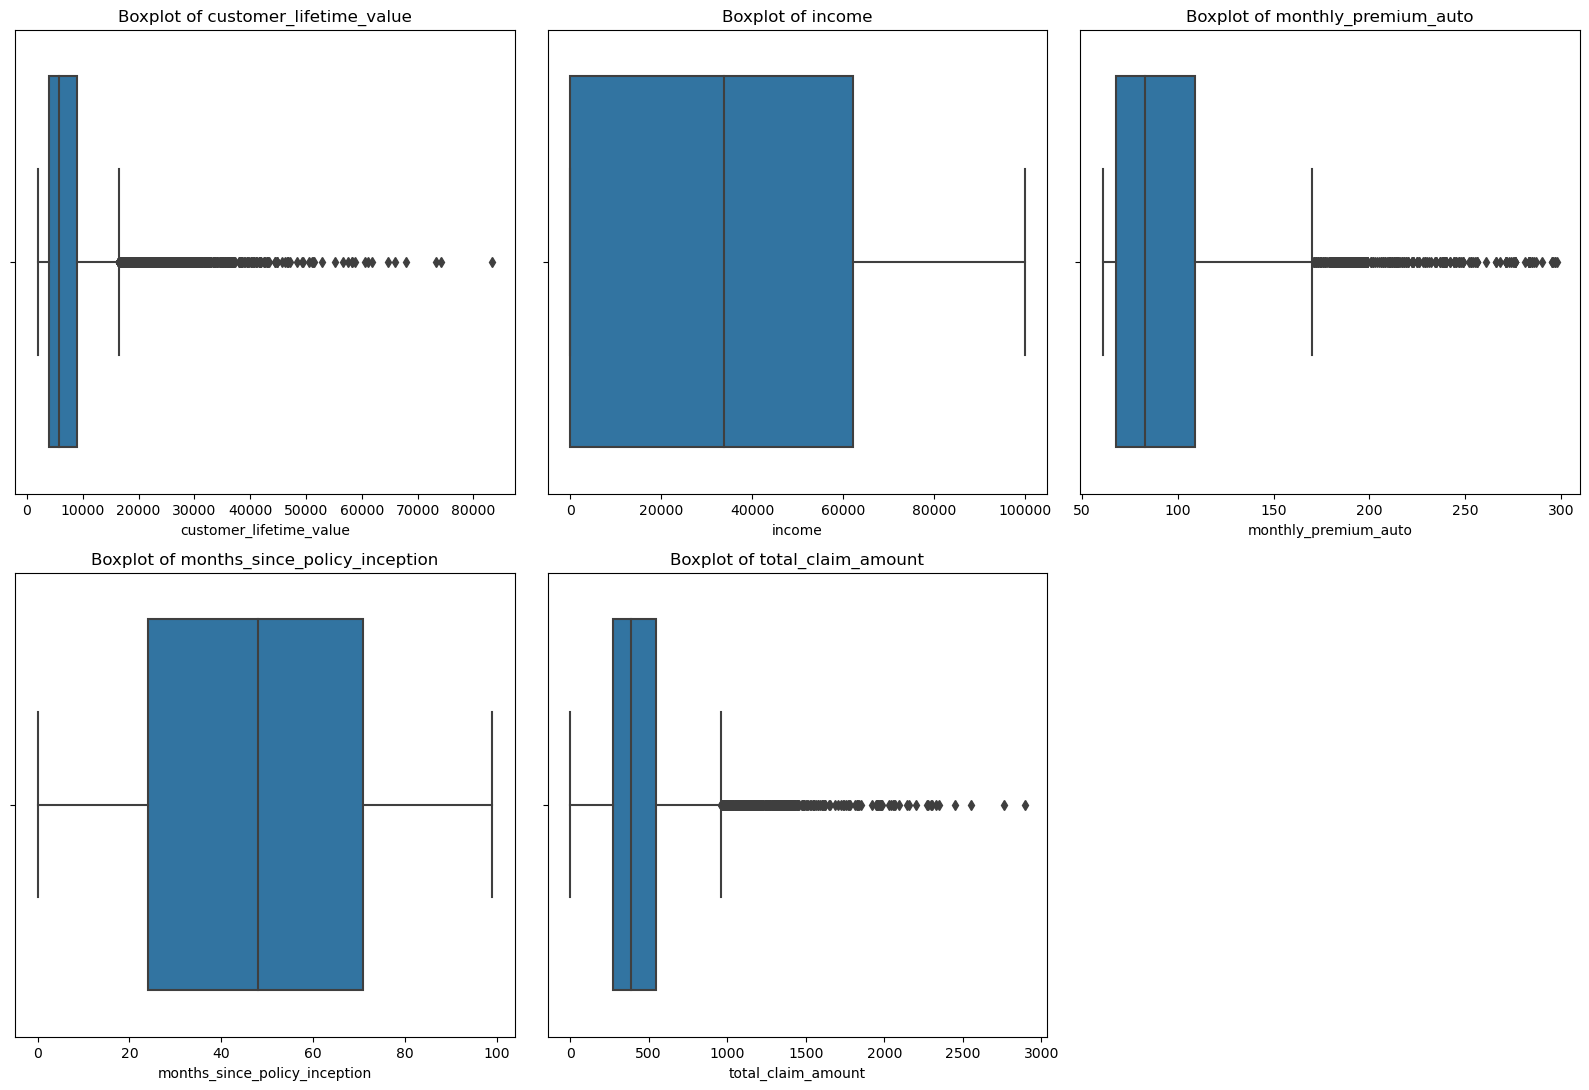

In [19]:
# we appreciate in the histogram graphs that there isn't a continuous distributions of the variables (it isn't normally distributed). Therefore we need to apply a tranformation to make the data more suitable for the analysis.
# We create a boxplot to identify outliers in the continuous variable. 

def plot_outliers(df):
    plt.figure(figsize=(16, 16))
    for i, column in enumerate(df.columns):
        plt.subplot(3, 3, i + 1)
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot of {column}')
    plt.tight_layout()
    plt.show()

#boxplots for continuous columns
plot_outliers(continuous_df)


In [20]:
# We visualize the distributions of discrete and continuous variables, identifying potential transformations needed, and detect outliers in the continuous variables.

LAB CLEANING CATEGORICAL DATA 

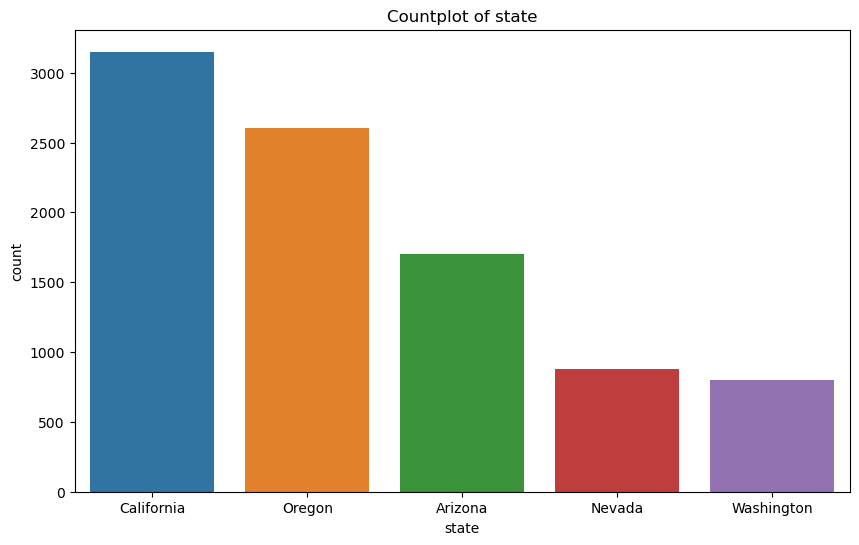

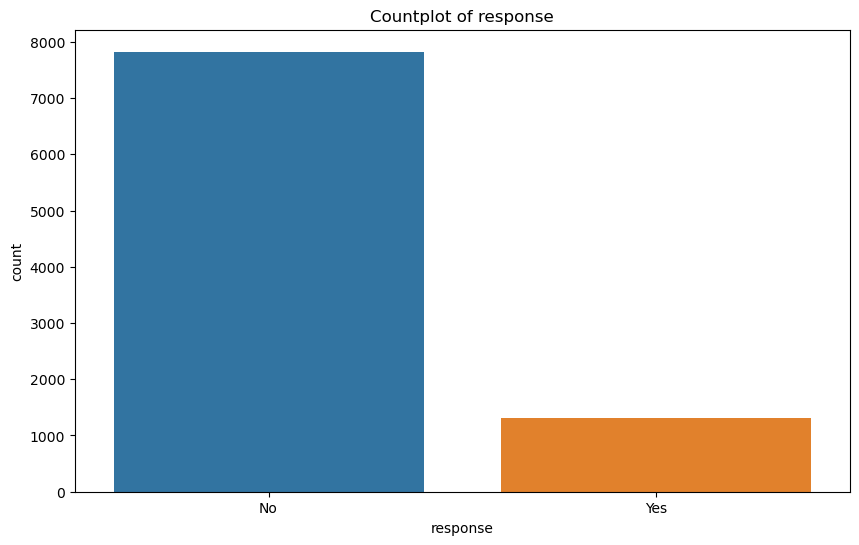

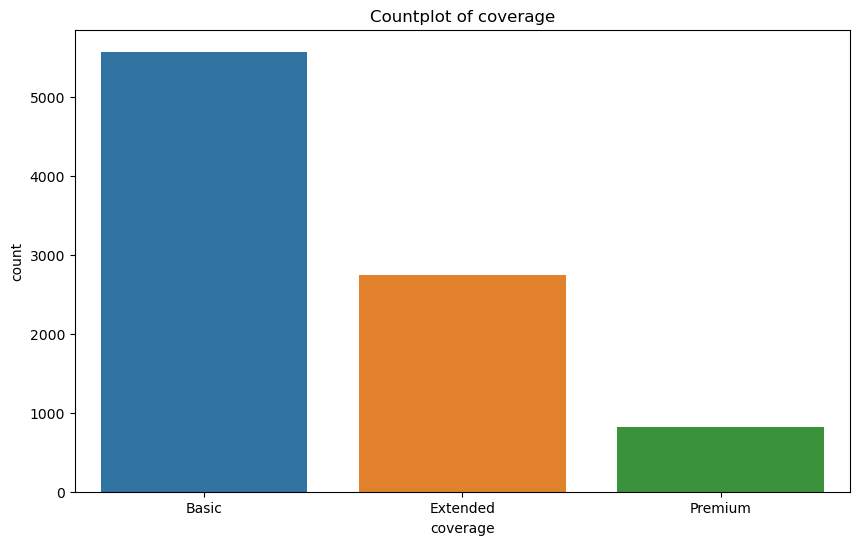

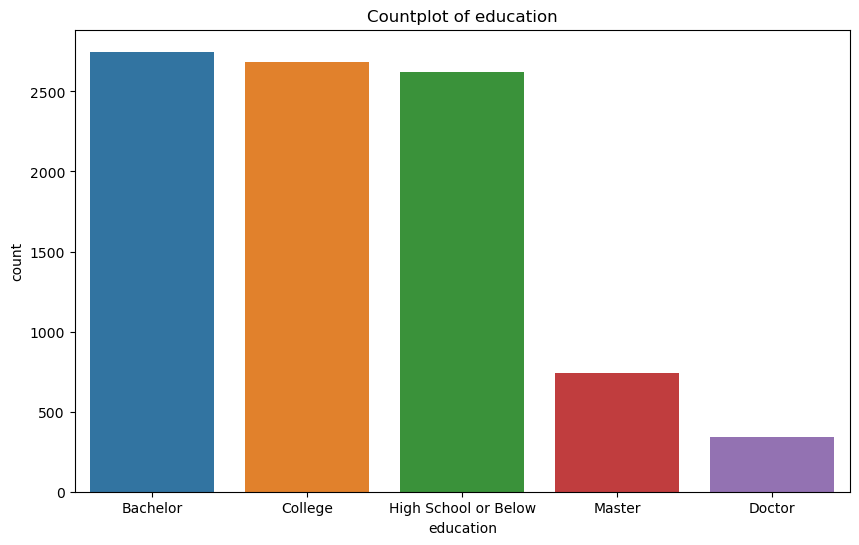

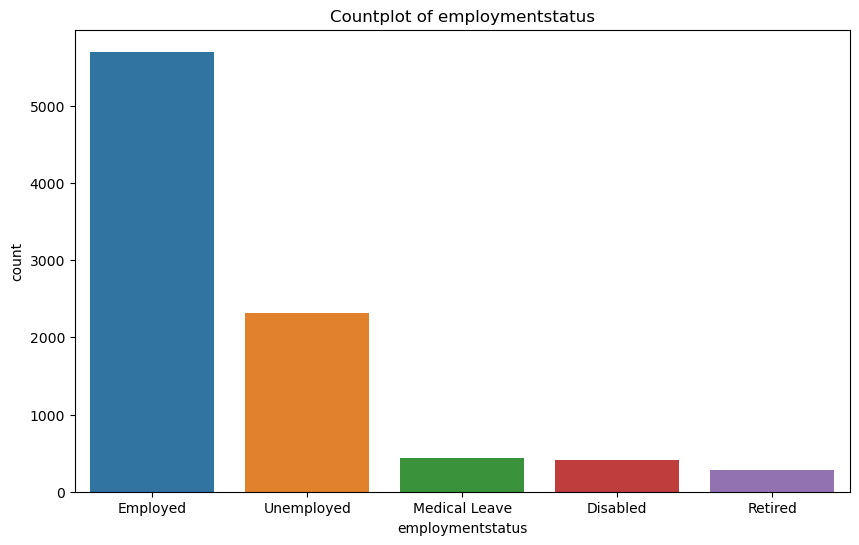

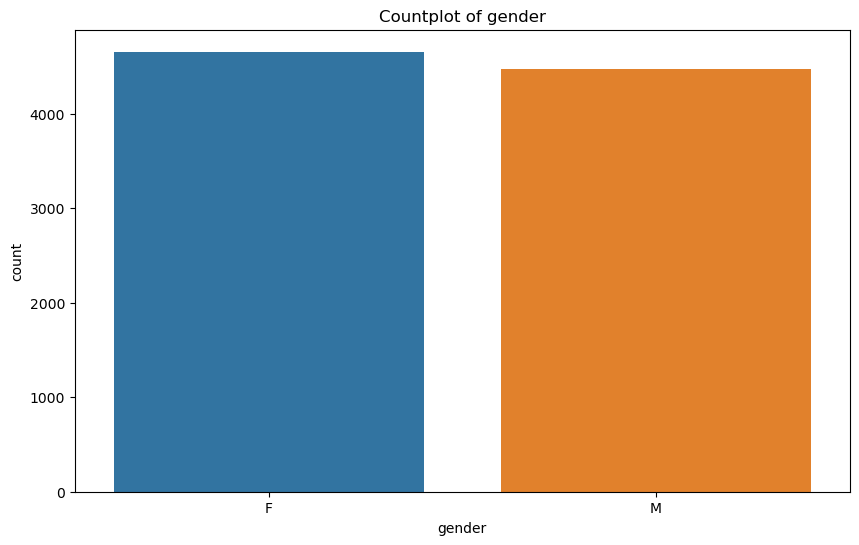

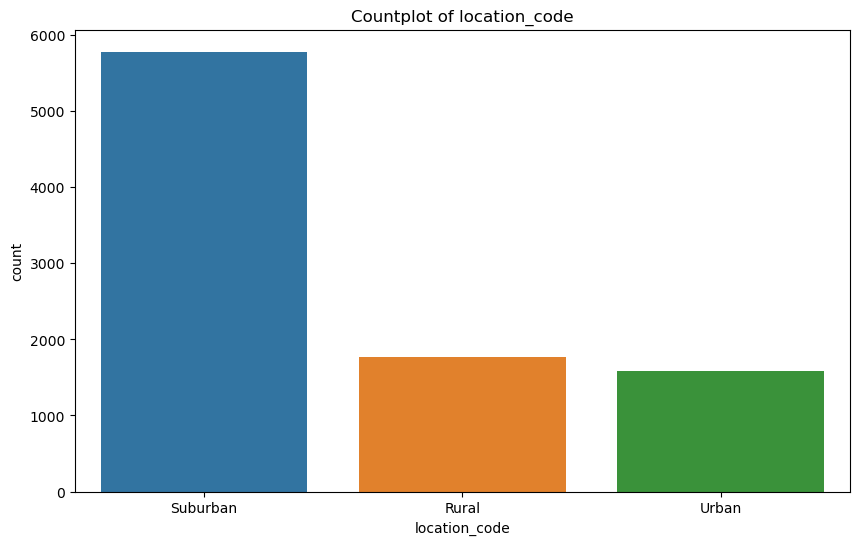

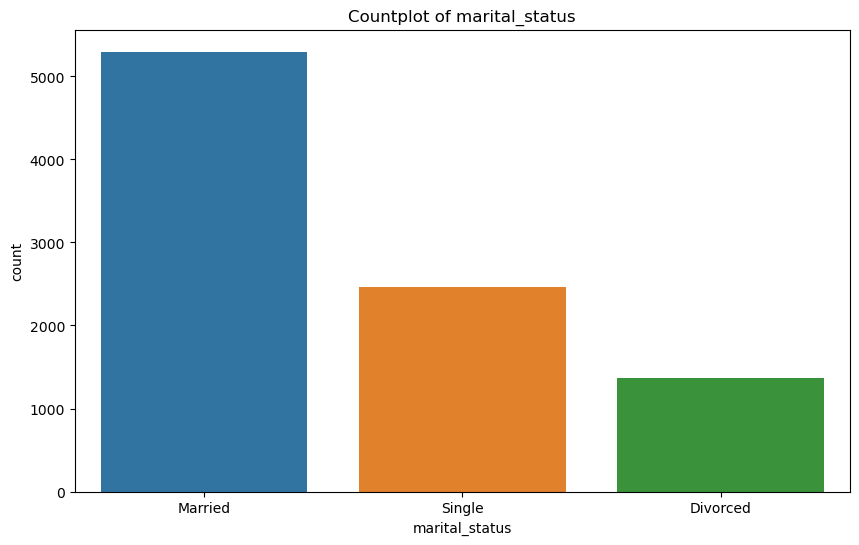

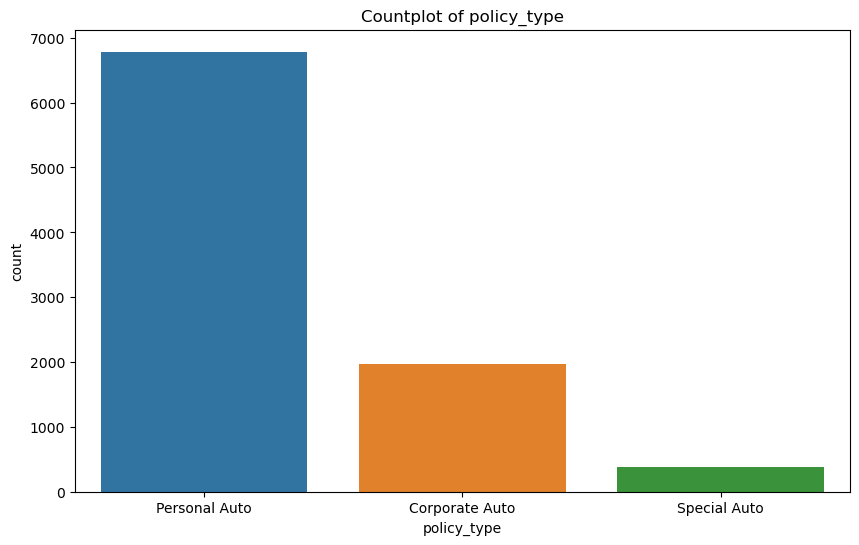

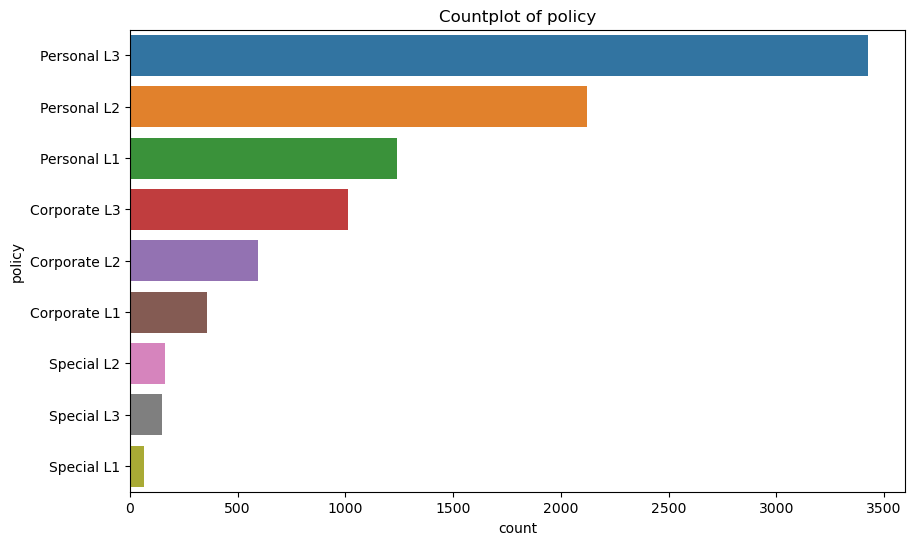

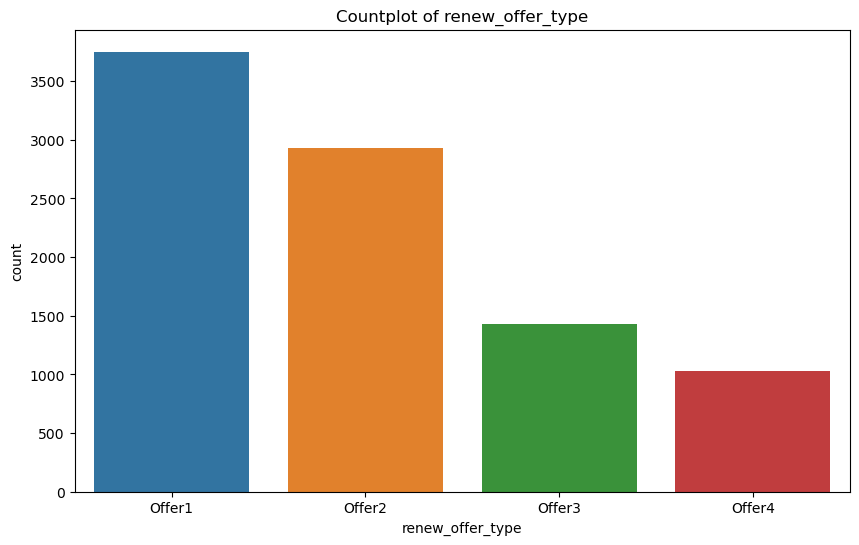

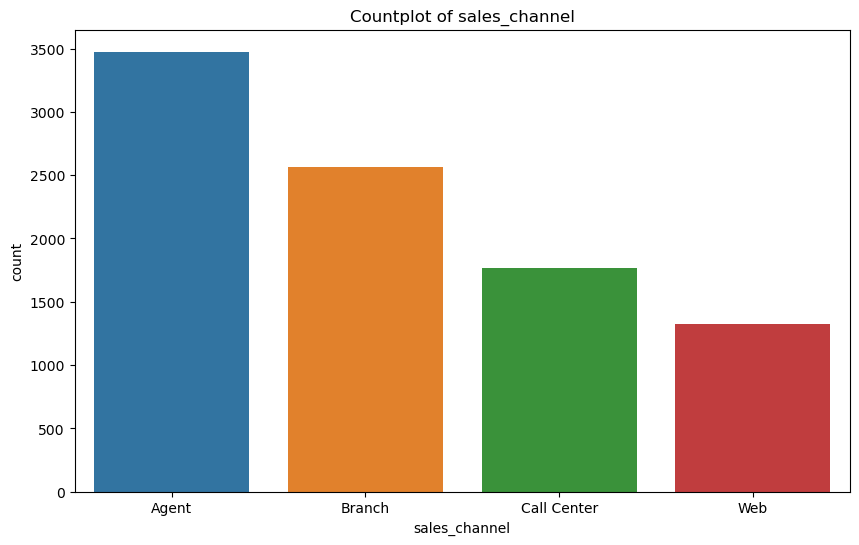

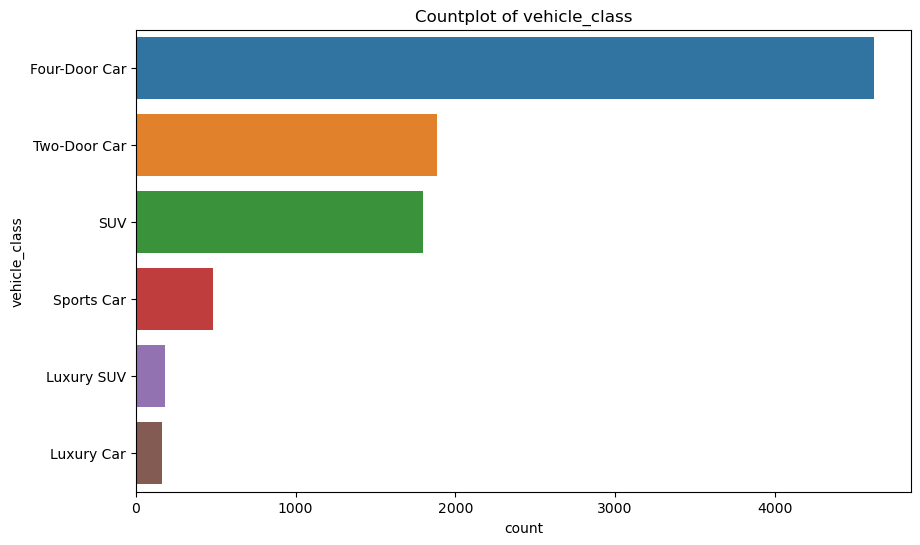

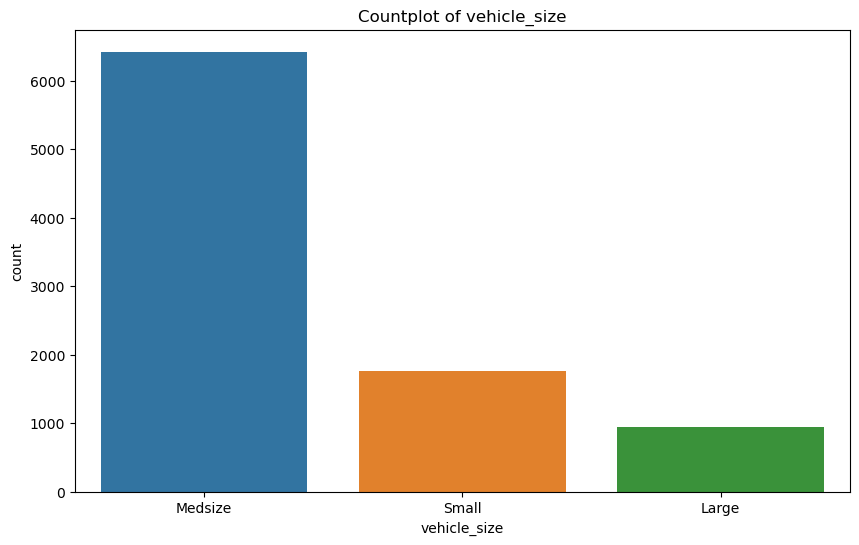

In [21]:
#creating countplots for each categorical column
def plot_categorical_columns(df):
    categorical_columns = df.select_dtypes(include=['object']).columns

    for column in categorical_columns:
        plt.figure(figsize=(10, 6))

        # Check cardinality and choose orientation accordingly
        if len(df[column].value_counts()) >= 6:
            sns.countplot(y=column, data=df, order=df[column].value_counts().index)
        else:
            sns.countplot(x=column, data=df, order=df[column].value_counts().index)

        plt.title(f'Countplot of {column}')
        plt.show()

# plot countplots for categorical columns
plot_categorical_columns(customer_df)

In [22]:
print(customer_df.columns)



Index(['state', 'customer_lifetime_value', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'income',
       'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')


In [23]:
customer_df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [24]:
def transform_policy_column(df):
    # Drop the policy_type column if it exists
    df = df.drop(columns='policy_type', errors='ignore')

    # Transform the policy column
    def transform_policy(policy):
        if policy.startswith('Personal'):
            return 'L1'
        elif policy.startswith('Corporate'):
            return 'L2'
        elif policy.startswith('Special'):
            return 'L3'
        else:
            return policy

    df['policy'] = df['policy'].apply(transform_policy)
    return df

# Apply the transformation
customer_df = transform_policy_column(customer_df)


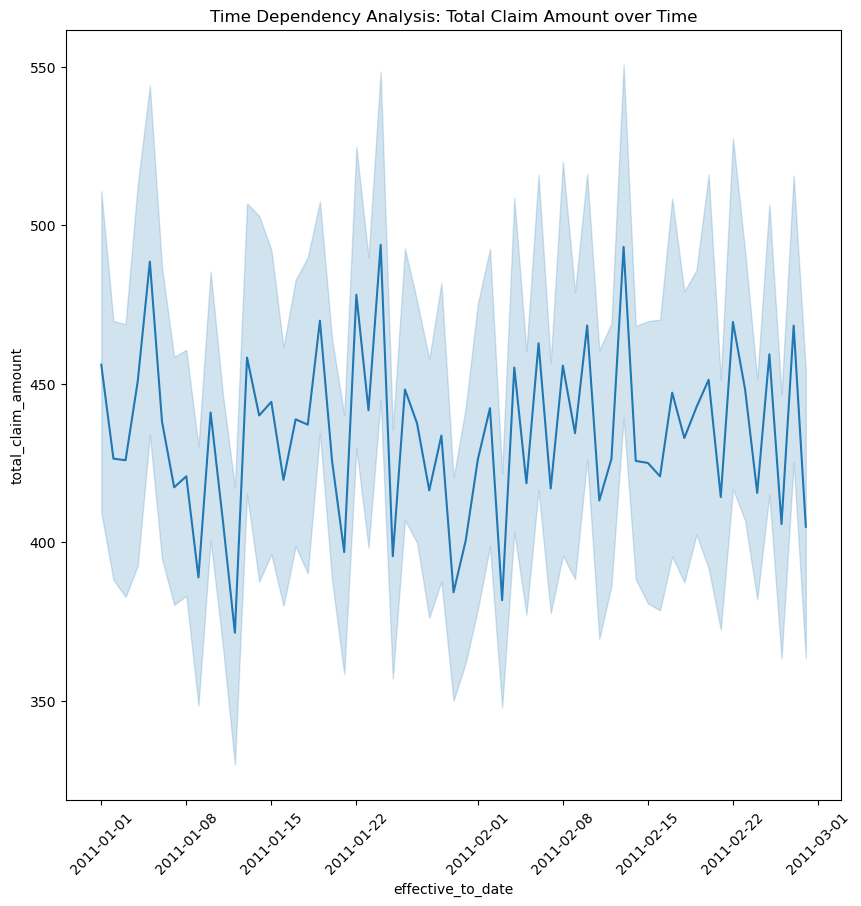

In [25]:
#Time dependency analysis, seaborn line plot
plt.figure(figsize=(10, 10))
sns.lineplot(x='effective_to_date', y='total_claim_amount', data=customer_df)
plt.title('Time Dependency Analysis: Total Claim Amount over Time')
plt.xticks(rotation=45)
plt.show()


In [26]:
# Creating an empty DataFrame
date_analysis_df = pd.DataFrame()

# Adding new columns
date_analysis_df['day'] = customer_df['effective_to_date'].dt.day
date_analysis_df['day_name'] = customer_df['effective_to_date'].dt.day_name()
date_analysis_df['week'] = customer_df['effective_to_date'].dt.isocalendar().week
date_analysis_df['month'] = customer_df['effective_to_date'].dt.month_name()
date_analysis_df['total_claim_amount'] = customer_df['total_claim_amount']

date_analysis_df.head()


,day,day_name,week,month,total_claim_amount
0,24,Thursday,8,February,384.811147
1,31,Monday,5,January,1131.464935
2,19,Saturday,7,February,566.472247
3,20,Thursday,3,January,529.881344
4,3,Thursday,5,February,138.130879


In [27]:
#computing the total 'target' column aggregated by 'day_name'
total_by_day_name = date_analysis_df.groupby('day_name')['total_claim_amount'].sum().round(2)

# List of correct days for reindexing
list_of_correct_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex 
total_by_day_name = total_by_day_name.reindex(index=list_of_correct_days)

# Displaying the resulting series
total_by_day_name



day_name
Monday       655689.71
Tuesday      502518.93
Wednesday    541563.05
Thursday     541820.80
Friday       533658.79
Saturday     608060.10
Sunday       581655.66
Name: total_claim_amount, dtype: float64

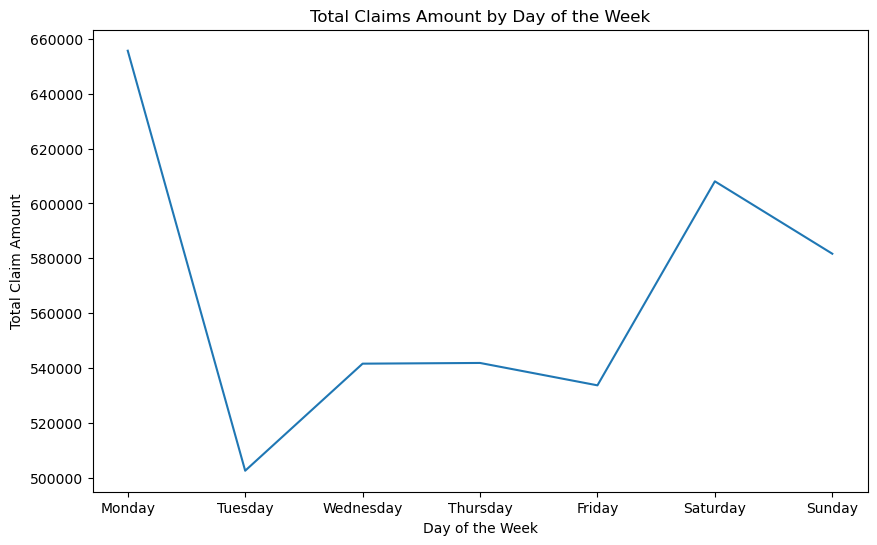

In [28]:
#seaborn line plot to visualize the total claims by day of the week. 
plt.figure(figsize=(10, 6))
sns.lineplot(x=total_by_day_name.index, y=total_by_day_name.values)
plt.title('Total Claims Amount by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Claim Amount')
plt.show()

In [29]:
#over the weekend the total number of claims are higher, specially on Monday.

# Computing the total number of claims by day of the week name
total_claims_by_day = date_analysis_df.groupby('day_name').size()

# Reorder the index of the resulting pandas series
total_claims_by_day = total_claims_by_day.reindex(index=list_of_correct_days)

# Display the resulting series
total_claims_by_day


day_name
Monday       1530
Tuesday      1162
Wednesday    1221
Thursday     1249
Friday       1245
Saturday     1397
Sunday       1330
dtype: int64

In [30]:
# Getting the median "target" by day of the week name
median_target_by_day = date_analysis_df.groupby('day_name')['total_claim_amount'].median().sort_values(ascending=False)

median_target_by_day


day_name
Thursday     395.328407
Wednesday    392.235698
Monday       385.735705
Sunday       383.721164
Saturday     379.200000
Tuesday      378.490829
Friday       371.803029
Name: total_claim_amount, dtype: float64

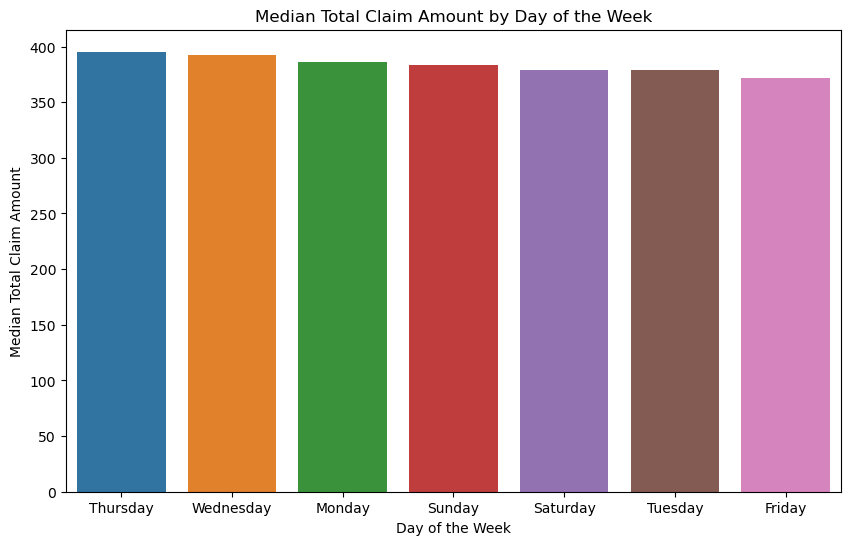

In [31]:
#"target" by day of the week name using a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=median_target_by_day.index, y=median_target_by_day.values)
plt.title('Median Total Claim Amount by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Median Total Claim Amount')
plt.show()


In [32]:
#the median of total claim amounts by day of the week are pretty similar, linear.

In [33]:
# Computing the total target column aggregated by month
total_by_month = date_analysis_df.groupby('month')['total_claim_amount'].sum().round(2)

# List of correct months for reindexing
list_of_correct_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Reindex the resulting pandas series
total_by_month = total_by_month.reindex(index=list_of_correct_months)

total_by_month


month
January      2117142.86
February     1847824.19
March               NaN
April               NaN
May                 NaN
June                NaN
July                NaN
August              NaN
September           NaN
October             NaN
November            NaN
December            NaN
Name: total_claim_amount, dtype: float64

In [34]:
#We shouldn't analyse all the months because gives NaN values(missing values) from March month onwards. It's unclear. Seems we only have data from the months of January and February. 
# Check unique months in the dataset
unique_months_in_data = date_analysis_df['month'].unique()
print(unique_months_in_data)


['February' 'January']


In [35]:
#removing outliers from numerical continuous column
def remove_outliers(column, thr=3):
    mean_val = column.mean()
    std_val = column.std()
    return column[(column >= mean_val - thr * std_val) & (column <= mean_val + thr * std_val)]


In [36]:
continuous_clean_df = customer_df.copy()

for column in continuous_df.columns:
    if column not in discrete_df.columns:  # Exclude discrete columns
        continuous_clean_df[column] = remove_outliers(continuous_clean_df[column])

continuous_clean_df.head()


,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,32,5,0,1,L2,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,13,42,0,8,L1,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,18,38,0,2,L1,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,18,65,0,7,L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,12,44,0,1,L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [37]:
# Identifyng and extracting categorical columns
categorical_columns = customer_df.select_dtypes(include=['object']).columns

# Creating the categorical_df DataFrame
categorical_df = customer_df[categorical_columns]

categorical_df.head()


,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,L2,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,L1,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,L1,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize


In [38]:
final_df = pd.concat([continuous_clean_df, discrete_df, categorical_df, date_analysis_df[['day', 'week', 'month']]], axis=1)

# Remove rows with NaN values
final_df = final_df.dropna().reset_index(drop=True)

final_df.head()




,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,week,month
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,Suburban,Married,L2,Offer1,Agent,Two-Door Car,Medsize,24,8,February
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,Suburban,Single,L1,Offer3,Agent,Four-Door Car,Medsize,31,5,January
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,Suburban,Married,L1,Offer1,Agent,Two-Door Car,Medsize,19,7,February
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize,20,3,January
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize,3,5,February


In [39]:
# Reordering columns with 'total_claim_amount' as the last column
final_df = final_df[[col for col in final_df.columns if col != 'total_claim_amount'] + ['total_claim_amount']]


In [40]:
# Convert 'response' column values to numeric (Yes=1, No=0)
final_df['response'] = final_df['response'].replace({'Yes': 1, 'No': 0})



In [41]:
# To reduce the class imbalance in 'education' we group ["Master","Doctor"] into "Graduate"
final_df['education'] = final_df['education'].replace({'Master': 'Graduate', 'Doctor': 'Graduate'})


In [42]:
#reducitng class imablance in 'employmentstatus', also grouping..
final_df['employmentstatus'] = final_df['employmentstatus'].replace({'Medical Leave': 'Inactive', 'Disabled': 'Inactive', 'Retired': 'Inactive'})


In [43]:
# Converting 'Gender' column values to numeric (Male=1, Female=0)
final_df['gender'] = final_df['gender'].replace({'M': 1, 'F': 0})


In [44]:
# Grouping ["Sports Car", "Luxury SUV", "Luxury Car"] into "Luxury"
final_df['vehicle_class'] = final_df['vehicle_class'].replace({'Sports Car': 'Luxury', 'Luxury SUV': 'Luxury', 'Luxury Car': 'Luxury'})


In [45]:
# Encoding 'coverage' column
coverage_mapping = {'Premium': 2, 'Extended': 1, 'Basic': 0}
final_df['coverage'] = final_df['coverage'].replace(coverage_mapping)



In [46]:
# Encoding 'employmentstatus' column
employmentstatus_mapping = {'Employed': 2, 'Inactive': 1, 'Unemployed': 0}
final_df['employmentstatus'] = final_df['employmentstatus'].replace(employmentstatus_mapping)


In [47]:
# Encoding 'location_code' column
location_code_mapping = {'Urban': 2, 'Suburban': 1, 'Rural': 0}
final_df['location_code'] = final_df['location_code'].replace(location_code_mapping)


In [48]:
# Encoding 'vehicle_size' column
vehicle_size_mapping = {'Large': 2, 'Medsize': 1, 'Small': 0}
final_df['vehicle_size'] = final_df['vehicle_size'].replace(vehicle_size_mapping)


In [49]:
# Selecting categorical nominal columns
categorical_nominal_df = final_df.select_dtypes(include=['object'])


In [53]:
# Tried to create a list of levels for each categorical nominal column.
levels = [final_df[col].unique().tolist() for col in final_df[categorical_nominal_cols]]








NameError: name 'categorical_nominal_cols' is not defined

In [52]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', categories=levels)

# Transform the categorical nominal columns
encoded_data = encoder.fit_transform(final_df[categorical_nominal_cols])

# Convert the result to a DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_nominal_cols))

# Concatenate the encoded DataFrame with the original DataFrame
final_df_encoded = pd.concat([final_df, encoded_df], axis=1)

# Drop the original categorical nominal columns
final_df_encoded = final_df_encoded.drop(columns=categorical_nominal_cols)


NameError: name 'levels' is not defined